In [2]:
# formules voor verplaatsing 
def afstandBepalen(vm, hoek, hs):
    g = 9.81  
    cos_hoek = math.cos(hoek)
    sin_hoek = math.sin(hoek)
    term = (vm * sin_hoek) + math.sqrt((vm**2) * (sin_hoek**2) + 2 * g * hs)
    return vm * cos_hoek * (term / g)

def beginSnelheid(R, hoek, hs):
    g = 9.81  
    cos_hoek = math.cos(hoek)
    sin_hoek = math.sin(hoek)
    teller = g * R**2
    noemer = 2 * cos_hoek * (R * sin_hoek + cos_hoek * hs)
    return math.sqrt(teller / noemer)

def vereisteHoogte(vm, hoek, R):
    g = 9.81  
    cos_hoek = math.cos(hoek)
    sin_hoek = math.sin(hoek)
    teller = R * (0.5 * g * R - vm**2 * cos_hoek * sin_hoek)
    noemer = (vm**2) * (cos_hoek**2)
    return teller / noemer


In [21]:
# model geen luchtweerstand 
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

g = 9.81


def plot_trajectory(schietHoogte, snelheid, hoek_graden, doel_afstand):

    hoek = math.radians(hoek_graden)

   
    afstand = afstandBepalen(snelheid, hoek, schietHoogte)
    vx = snelheid * math.cos(hoek)

    tijd = afstand / vx if vx != 0 else 0

  
    def xPos(t):
        return vx * t
    def yPos(t):
        return schietHoogte + snelheid * math.sin(hoek) * t - 0.5 * g * t**2

    def min0(num):
        return num if num >= 0 else 0

   
    TL = np.linspace(0, tijd, 500)
    Xas = [xPos(tt) for tt in TL]
    Yas = [min0(yPos(tt)) for tt in TL]

    
    plt.figure(figsize=(8, 5))
    plt.plot(Xas, Yas, label="Projectielbaan")
    plt.axhline(y=0, color='k', linewidth=0.5, label="Grond")
    
    # Maximale afstand
    plt.axvline(x=afstand, color='r', linestyle="--", label="Maximale afstand")

    # doel afstand
    plt.axvline(x=doel_afstand, color='b', linestyle="--", label="Doelafstand")

    plt.xlabel("Afstand (m)")
    plt.ylabel("Hoogte (m)")
    plt.title("Projectielbaan (zonder luchtweerstand)")
    plt.grid()
    plt.legend()
    plt.show()

def voorbeeldProjectiel():
   
    schietHoogte_slider = widgets.FloatSlider(min=0, max=0.5, step=0.05, value=0.25, description="Schiet hoogte (m)" )
    snelheid_slider = widgets.FloatSlider(min=1, max=34, step=0.01, value=10, description="Snelheid (m/s)")
    hoek_slider = widgets.FloatSlider(min=1, max=60, step=1, value=45, description="Schiet hoek (°)")
    doel_afstand_slider = widgets.FloatSlider(min=0, max=36, step=1, value=10, description="Doel afstand (m)")

    return widgets.interactive(
        plot_trajectory,
        schietHoogte=schietHoogte_slider,
        snelheid=snelheid_slider,
        hoek_graden=hoek_slider,
        doel_afstand=doel_afstand_slider
    )

voorbeeldProjectiel()


interactive(children=(FloatSlider(value=0.25, description='Schiet hoogte (m)', max=0.5, step=0.05), FloatSlide…

Schiet hoogte (m):  0
Beginsnelheid (m/s):  6.017
Schiet hoek (°):  139.9


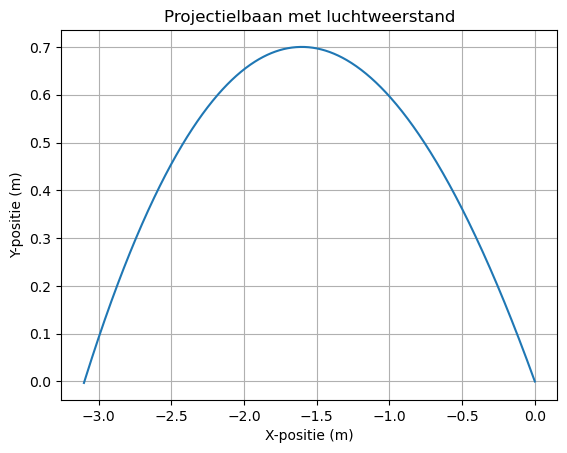

In [20]:
# import matplotlib.pyplot as plt
import numpy as np
import math


g = 9.81     


k = 0.065      

dt = 0.001    

# Gebruikersinvoer
y = float(input("Schiet hoogte (m): "))
snelheid = float(input("Beginsnelheid (m/s): "))
hoek = float(input("Schiet hoek (°): ")) * (math.pi / 180)  

x = 0.0
vx = snelheid * math.cos(hoek)
vy = snelheid * math.sin(hoek)
t = 0.0

x_vals = [x]
y_vals = [y]

while y >= 0:
    v = math.sqrt(vx**2 + vy**2)

    ax = -k * v * vx
    ay = -g - k * v * vy

    vx += ax * dt
    vy += ay * dt

    x += vx * dt
    y += vy * dt

    x_vals.append(x)
    y_vals.append(y)

    # Tijd updaten
    t += dt

# Resultaten plotten
plt.plot(x_vals, y_vals)
plt.xlabel("X-positie (m)")
plt.ylabel("Y-positie (m)")
plt.title("Projectielbaan met luchtweerstand")
plt.grid(True)
plt.show()


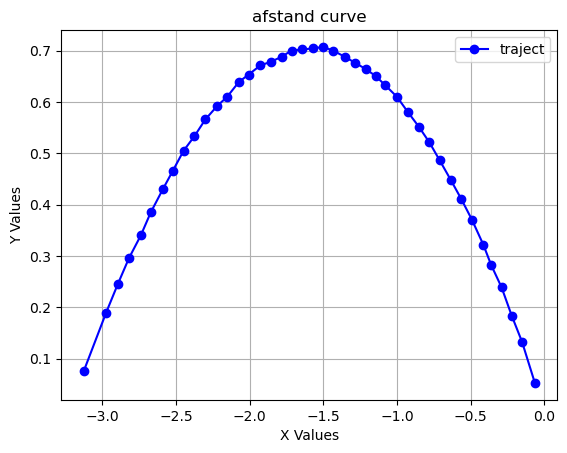

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
df = pd.read_csv("csvWorpCsv_cleaned.csv", sep=';', encoding="utf-8")



x = df["x(m)"]
y = df["y(m)"]

plt.plot(x, y, marker='o', linestyle='-', color='b', label="traject")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("afstand curve")
plt.legend()
plt.grid(True)
plt.show()
